# P519_Insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\kavya\\OneDrive\\Attachments\\Desktop\\P519-Insurence-project\\Claimants_Dataset.csv')
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,5,0,0.0,1.0,0.0,50.0,2367.86,Severe,4497.19,1,3221.74,Third-Party,Clean
1,3,1,1.0,0.0,0.0,18.0,3746.41,Minor,6216.38,1,6166.17,Comprehensive,Clean
2,66,1,0.0,1.0,0.0,5.0,14282.43,Severe,17978.55,0,13804.61,Comprehensive,Minor Offenses
3,70,0,0.0,1.0,1.0,31.0,519.12,Severe,753.54,1,596.25,Comprehensive,Clean
4,96,1,0.0,1.0,0.0,30.0,1354.31,Minor,2167.42,0,1714.83,Comprehensive,Clean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,11749.94,Moderate,14992.27,0,13533.51,Comprehensive,Clean
1336,34110,0,1.0,1.0,0.0,46.0,776.62,Moderate,1438.79,0,1178.05,Third-Party,Major Offenses
1337,34113,1,1.0,1.0,0.0,39.0,13261.20,Severe,18106.45,1,16782.44,Third-Party,Minor Offenses
1338,34145,0,1.0,0.0,0.0,8.0,9919.60,Minor,17119.15,1,14315.98,Third-Party,Clean


## Data Exploration and Preprocessing:

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CASENUM,1340.0,11202.001493,9512.750796,0.00,4177.0000,8756.500,15702.5000,34153.00
ATTORNEY,1340.0,0.488806,0.500061,0.00,0.0000,0.000,1.0000,1.00
CLMSEX,1328.0,0.558735,0.496725,0.00,0.0000,1.000,1.0000,1.00
CLMINSUR,1299.0,0.907621,0.289671,0.00,1.0000,1.000,1.0000,1.00
SEATBELT,1292.0,0.017028,0.129425,0.00,0.0000,0.000,0.0000,1.00
CLMAGE,1151.0,28.414422,20.304451,0.00,9.0000,30.000,43.0000,95.00
LOSS,1340.0,6684.598149,3785.039412,296.41,3414.0525,6781.575,9708.8825,15794.81
Claim_Amount_Requested,1340.0,10341.430276,5678.906970,562.76,5308.8900,10571.250,15291.6650,19988.57
Claim_Approval_Status,1340.0,0.480597,0.499810,0.00,0.0000,0.000,1.0000,1.00
Settlement_Amount,1340.0,8787.805463,4942.577454,424.52,4389.1000,8898.245,12646.1575,19566.51


In [4]:
# Summary statistics
df.describe(include='all')

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000,1340,1340.000000,1340.000000,1340.000000,1340,1340
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor,NaN,NaN,NaN,Comprehensive,Minor Offenses
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465,NaN,NaN,NaN,689,473
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,6684.598149,NaN,10341.430276,0.480597,8787.805463,NaN,NaN
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,3785.039412,NaN,5678.906970,0.499810,4942.577454,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,296.410000,NaN,562.760000,0.000000,424.520000,NaN,NaN
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3414.052500,NaN,5308.890000,0.000000,4389.100000,NaN,NaN
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,6781.575000,NaN,10571.250000,0.000000,8898.245000,NaN,NaN
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,9708.882500,NaN,15291.665000,1.000000,12646.157500,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASENUM                 1340 non-null   int64  
 1   ATTORNEY                1340 non-null   int64  
 2   CLMSEX                  1328 non-null   float64
 3   CLMINSUR                1299 non-null   float64
 4   SEATBELT                1292 non-null   float64
 5   CLMAGE                  1151 non-null   float64
 6   LOSS                    1340 non-null   float64
 7   Accident_Severity       1340 non-null   object 
 8   Claim_Amount_Requested  1340 non-null   float64
 9   Claim_Approval_Status   1340 non-null   int64  
 10  Settlement_Amount       1340 non-null   float64
 11  Policy_Type             1340 non-null   object 
 12  Driving_Record          1340 non-null   object 
dtypes: float64(7), int64(3), object(3)
memory usage: 136.2+ KB


In [6]:
for col in df[['ATTORNEY','CLMSEX','CLMINSUR','SEATBELT','Accident_Severity','Claim_Approval_Status','Policy_Type','Driving_Record']]:
    df_t = df[col].value_counts()
    print(f'group by for {df_t}')

group by for ATTORNEY
0    685
1    655
Name: count, dtype: int64
group by for CLMSEX
1.0    742
0.0    586
Name: count, dtype: int64
group by for CLMINSUR
1.0    1179
0.0     120
Name: count, dtype: int64
group by for SEATBELT
0.0    1270
1.0      22
Name: count, dtype: int64
group by for Accident_Severity
Minor       465
Severe      440
Moderate    435
Name: count, dtype: int64
group by for Claim_Approval_Status
0    696
1    644
Name: count, dtype: int64
group by for Policy_Type
Comprehensive    689
Third-Party      651
Name: count, dtype: int64
group by for Driving_Record
Minor Offenses    473
Clean             448
Major Offenses    419
Name: count, dtype: int64


## EDA

**Initial Observations**

- **Target Variable**: ATTORNEY (0 = No, 1 = Yes) – Binary classification problem.
- **Missing Values**: CLMSEX, CLMINSUR, SEATBELT, and CLMAGE have missing values.

**Data Types:**

- **Numerical**: LOSS, Claim_Amount_Requested, Settlement_Amount, CLMAGE, etc.
- **Categorical**: Accident_Severity, Policy_Type, Driving_Record (need encoding).
- **ID Column**: CASENUM is an identifier and should be dropped.

### Data Cleaning

In [7]:
# finding duplicates
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

df.duplicated().sum() # there is zero duplicates in data sets

Empty DataFrame
Columns: [CASENUM, ATTORNEY, CLMSEX, CLMINSUR, SEATBELT, CLMAGE, LOSS, Accident_Severity, Claim_Amount_Requested, Claim_Approval_Status, Settlement_Amount, Policy_Type, Driving_Record]
Index: []


np.int64(0)

In [8]:
# Drop the CASENUM column
df.drop(columns=["CASENUM"], inplace=True)

C:\Users\kavya\AppData\Local\Temp\ipykernel_23264\2507561183.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


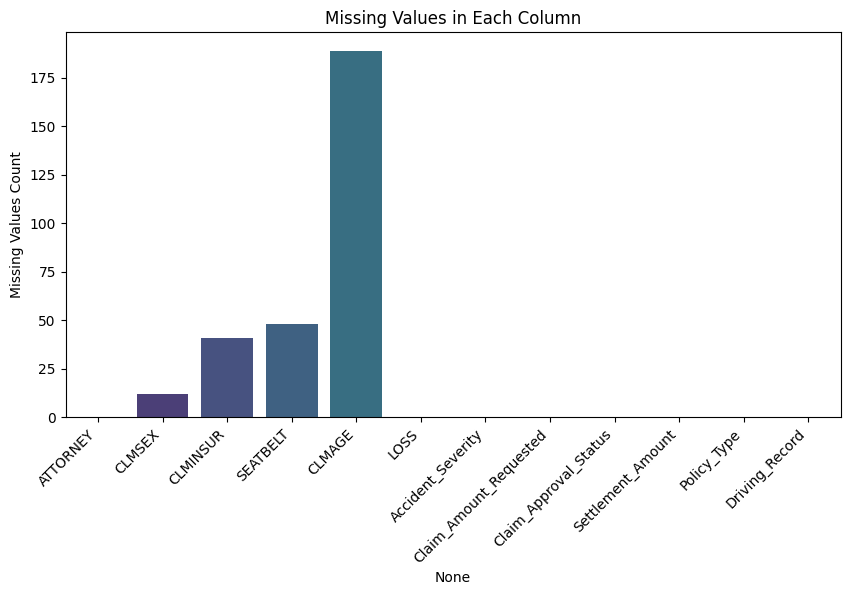

ATTORNEY                    0
CLMSEX                     12
CLMINSUR                   41
SEATBELT                   48
CLMAGE                    189
LOSS                        0
Accident_Severity           0
Claim_Amount_Requested      0
Claim_Approval_Status       0
Settlement_Amount           0
Policy_Type                 0
Driving_Record              0
dtype: int64

In [9]:
# Check missing values
missing_values = df.isnull().sum()

# Plot missing values
plt.figure(figsize=(10,5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Each Column")
plt.show()

# Display missing values count
missing_values


In [10]:
# Impute categorical columns with mode
df["CLMSEX"] = df["CLMSEX"].fillna(df["CLMSEX"].mode()[0])
df["CLMINSUR"] = df["CLMINSUR"].fillna(df["CLMINSUR"].mode()[0])
df["SEATBELT"] = df["SEATBELT"].fillna(df["SEATBELT"].mode()[0])




# Impute numerical column (CLMAGE) with median
df["CLMAGE"] = df["CLMAGE"].fillna(df["CLMAGE"].median())
#df["CLMAGE"].fillna(df["CLMAGE"].median(), inplace=True)

In [11]:
# Verify missing values are handled
df.isnull().sum()

ATTORNEY                  0
CLMSEX                    0
CLMINSUR                  0
SEATBELT                  0
CLMAGE                    0
LOSS                      0
Accident_Severity         0
Claim_Amount_Requested    0
Claim_Approval_Status     0
Settlement_Amount         0
Policy_Type               0
Driving_Record            0
dtype: int64

### Data Visualization

<Axes: >

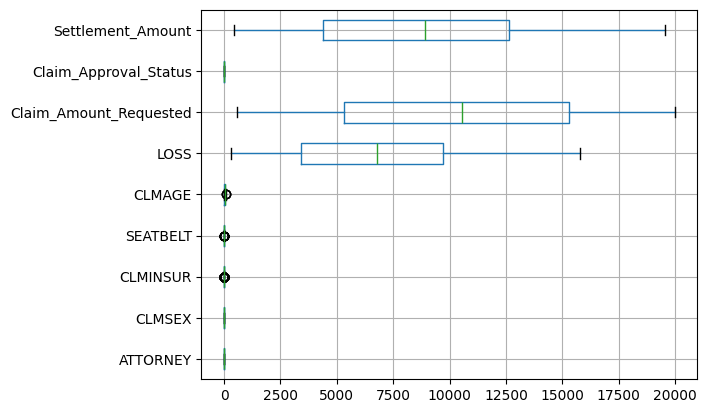

In [12]:
df.boxplot(vert = False)

In [13]:
#CLMAGE
# IQR Method
Q1 = np.quantile(df["CLMAGE"],0.25)
Q3 = np.quantile(df["CLMAGE"],0.75)
IQR = Q3 - Q1 
upper_boundary = Q3 + 1.5 * IQR
lower_boundary = Q1 - 1.5 * IQR
Median = df["CLMAGE"].median()
print(f'Column Name : Age \nQuartile 1 : {Q1} \nQuartile 3 : {Q3} \nlower boundary : {lower_boundary} \nupper boundary : {upper_boundary} \nMedian : {Median}')

outliers = df[(df["CLMAGE"] < lower_boundary) | (df["CLMAGE"] > upper_boundary)]
print(F'Number of Outliers : {outliers["CLMAGE"].count()}')
print(outliers["CLMAGE"])

Column Name : Age 
Quartile 1 : 10.0 
Quartile 3 : 40.0 
lower boundary : -35.0 
upper boundary : 85.0 
Median : 30.0
Number of Outliers : 3
635     95.0
737     88.0
1057    86.0
Name: CLMAGE, dtype: float64


<Axes: >

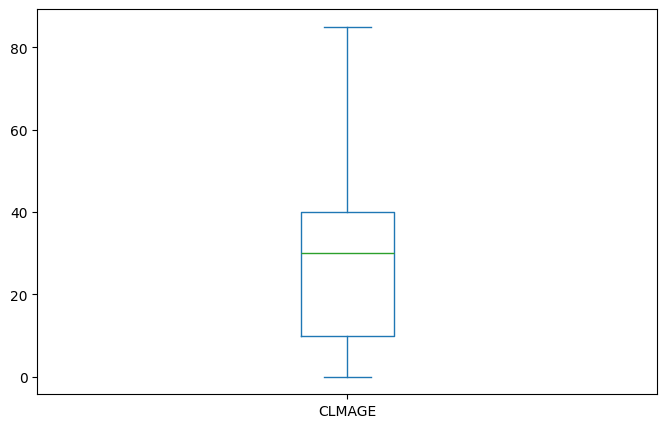

In [14]:
# Cap or Clamp Outliers: Replace extreme values with the upper or lower bounds
df['CLMAGE'] = df['CLMAGE'].clip(lower=lower_boundary, upper=upper_boundary)

df['CLMAGE'].plot(kind='box', figsize=(8, 5))

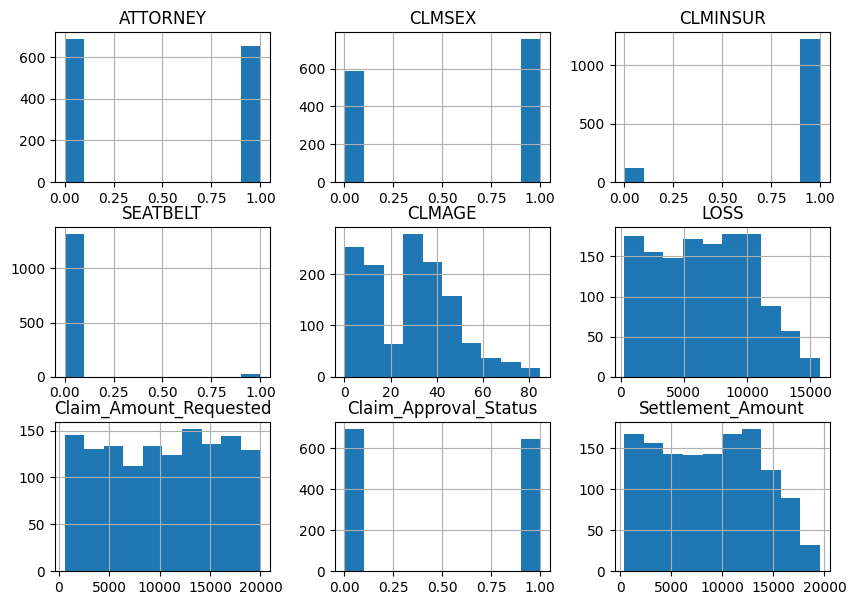

In [15]:
# Histogram
df.hist(figsize=(10,7))
plt.show()

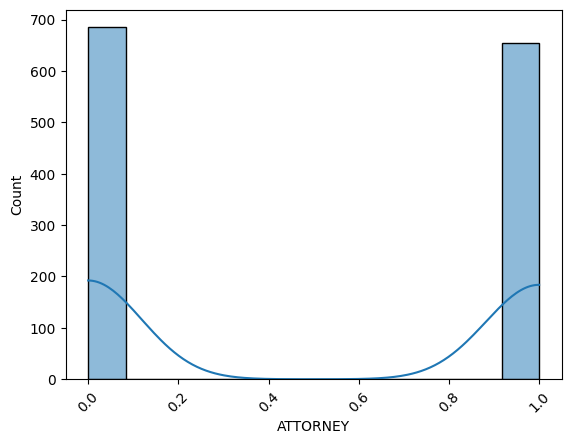

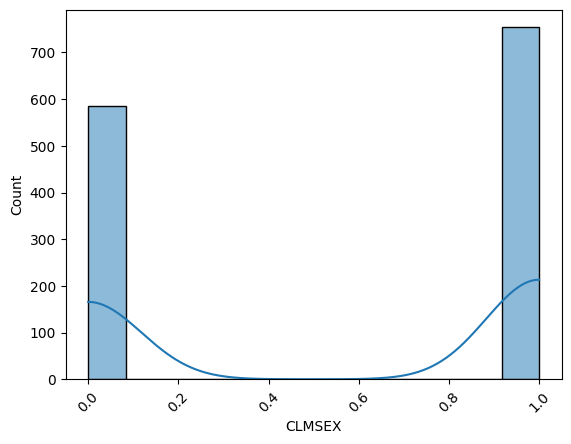

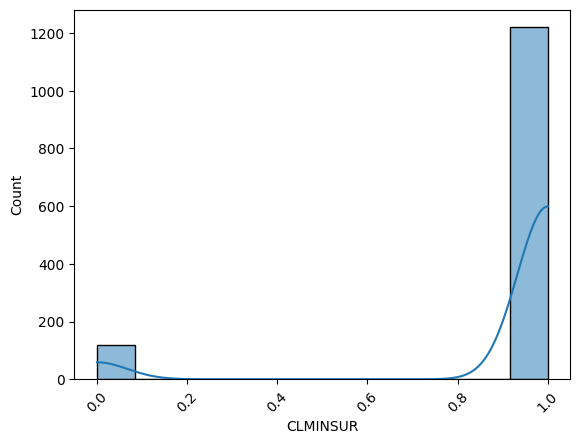

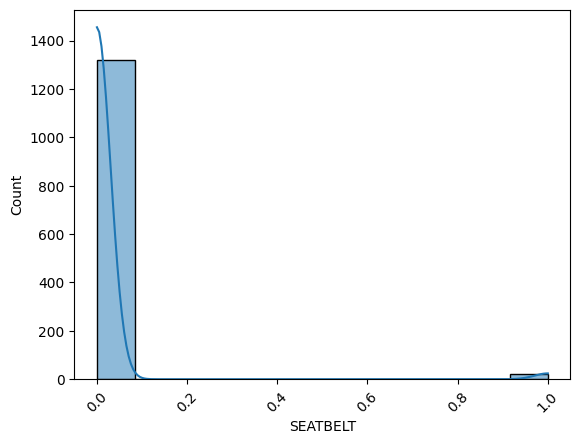

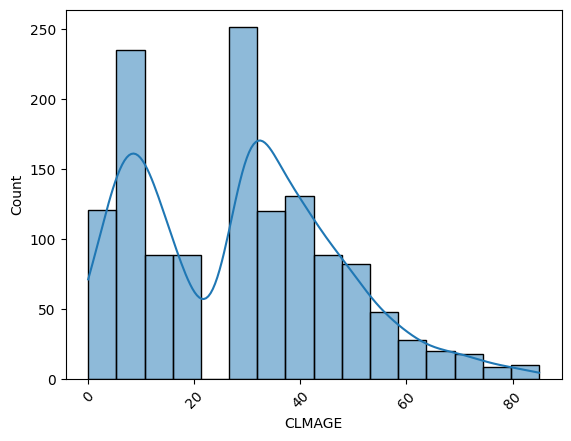

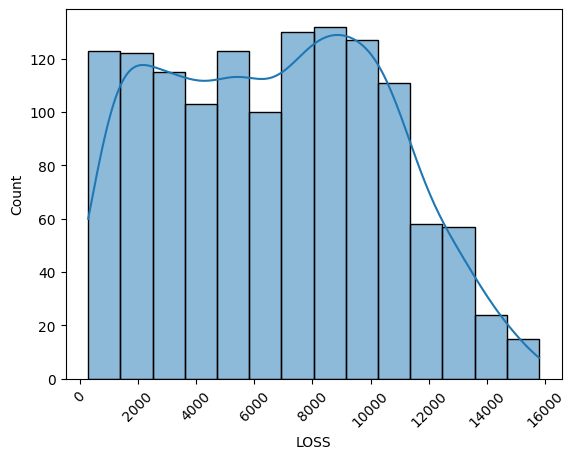

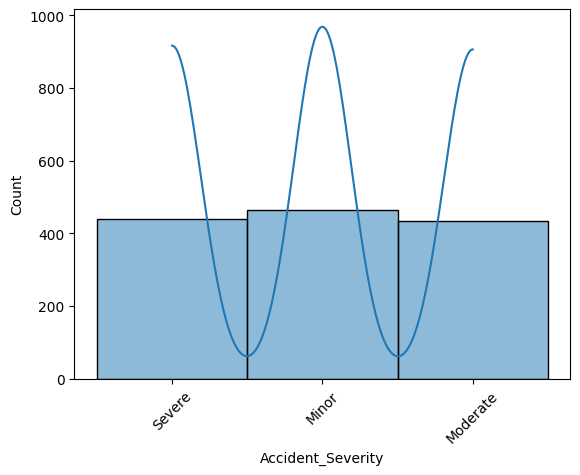

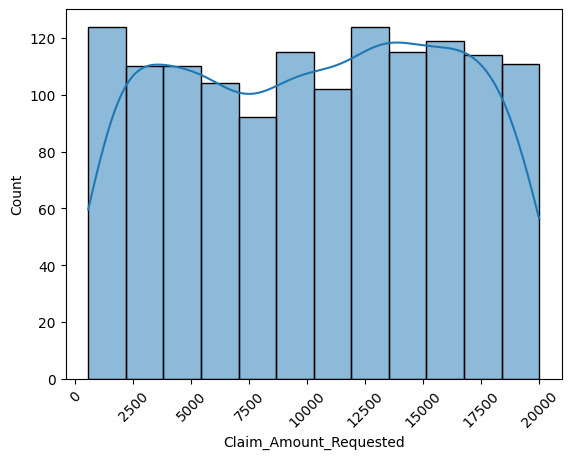

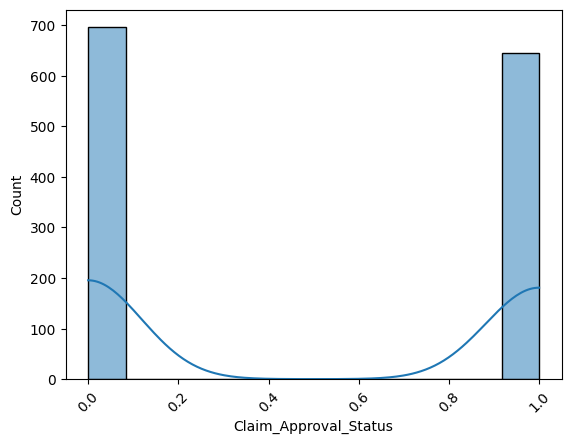

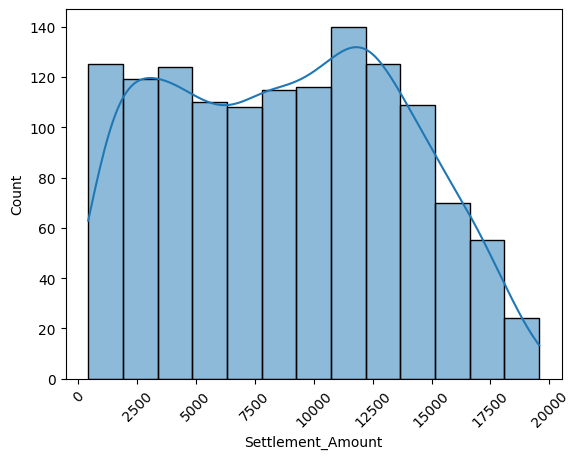

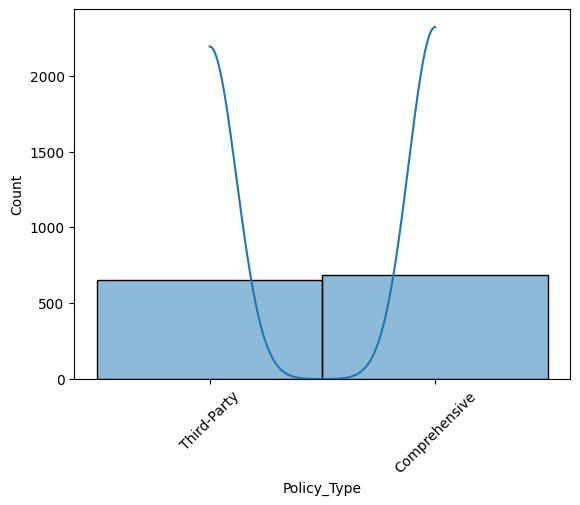

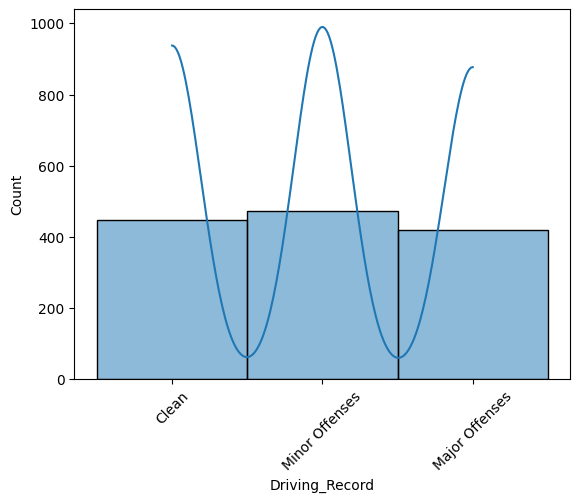

In [16]:
# histogram for Features
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.xticks(rotation=45)
    plt.show()

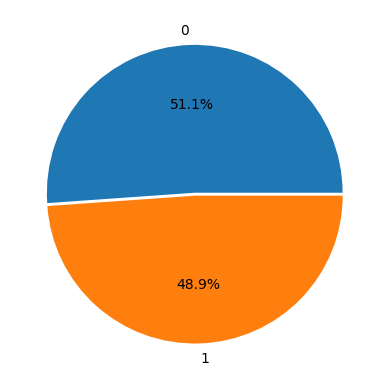

In [17]:
# Get the value counts and corresponding labels
value_counts = df['ATTORNEY'].value_counts()
labels = list(df['ATTORNEY'].unique())

# Create an explode list with small values for a compact pie chart
explode = [0.01] * len(labels)  # All values are small to keep the chart close

# Create the pie chart
plt.pie(value_counts, labels=labels, explode=explode, autopct='%1.1f%%')

# Display the pie chart
plt.show()

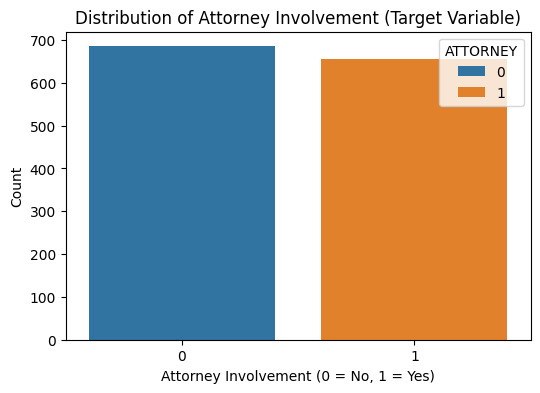

ATTORNEY
0    0.511194
1    0.488806
Name: proportion, dtype: float64

In [18]:
# Visualize the distribution of the target variable (ATTORNEY)
plt.figure(figsize=(6, 4))
sns.countplot(data = df, x='ATTORNEY', hue = 'ATTORNEY' )
plt.title("Distribution of Attorney Involvement (Target Variable)")
plt.xlabel("Attorney Involvement (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Check class imbalance
df["ATTORNEY"].value_counts(normalize=True)


**Target Variable Analysis:**

- The dataset is balanced with ~51% claims not involving an attorney and ~49% involving an attorney.
- No major class imbalance, so we don't need oversampling or undersampling.

Attorney involvement rate: 48.88%


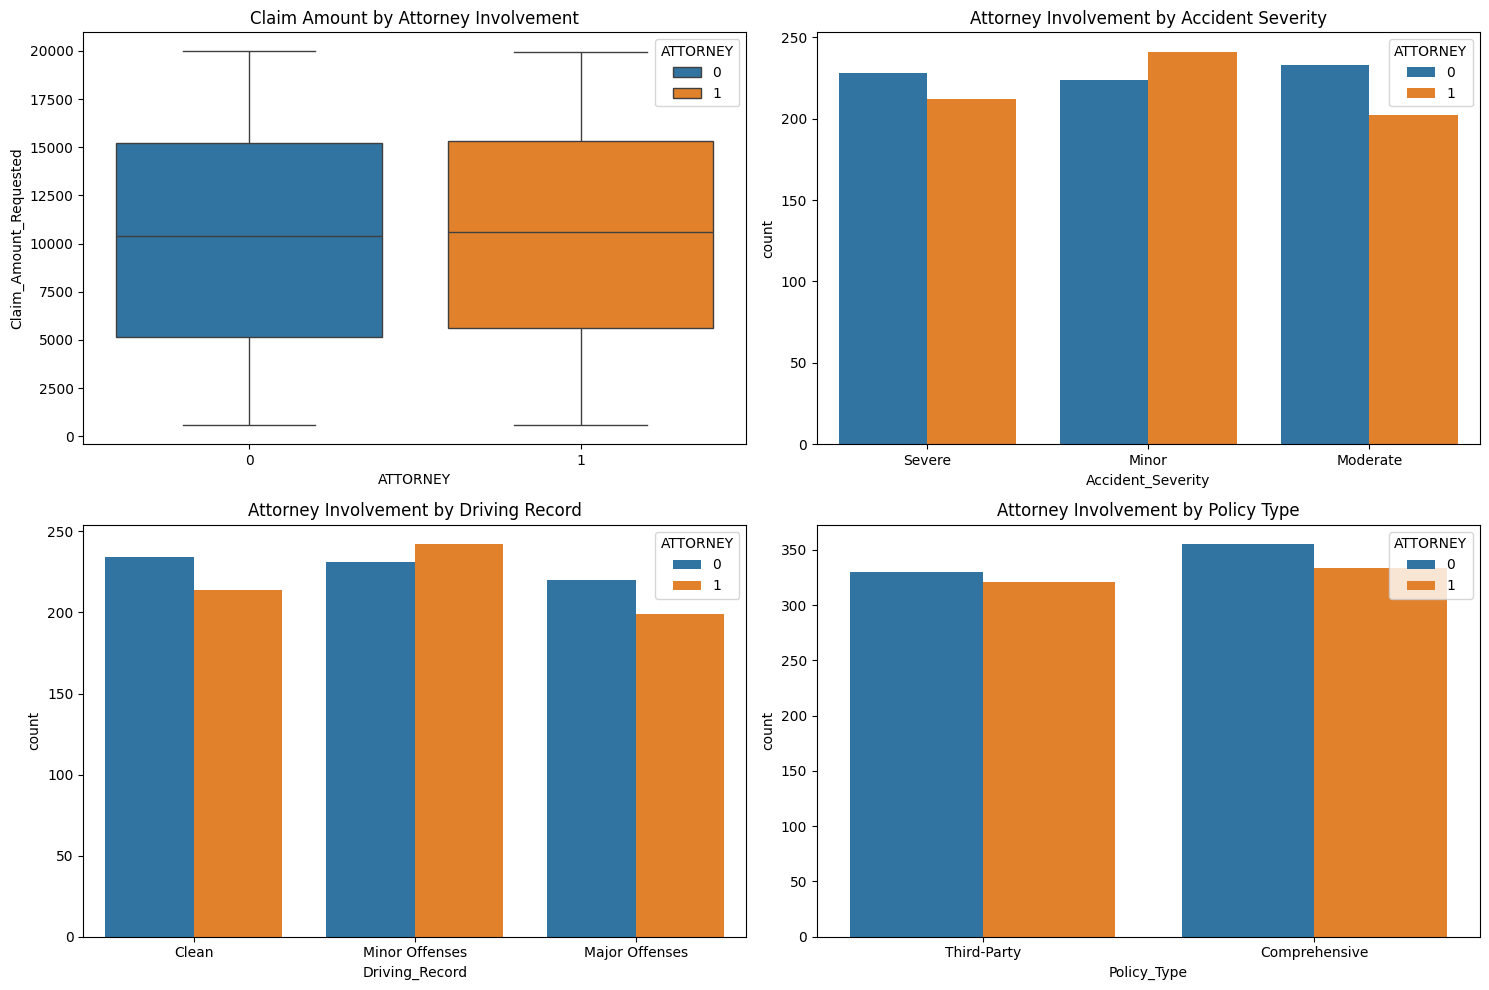

In [19]:

# Attorney involvement rate
attorney_rate = df['ATTORNEY'].mean()
print(f"Attorney involvement rate: {attorney_rate:.2%}")

# Visualize key relationships
plt.figure(figsize=(15, 10))

# Claim Amount vs Attorney Involvement
plt.subplot(2, 2, 1)
sns.boxplot(x='ATTORNEY', y='Claim_Amount_Requested', data=df, hue = 'ATTORNEY')
plt.title('Claim Amount by Attorney Involvement')

# Accident Severity vs Attorney Involvement
plt.subplot(2, 2, 2)
sns.countplot(x='Accident_Severity', hue='ATTORNEY', data=df)
plt.title('Attorney Involvement by Accident Severity')

# Driving Record vs Attorney Involvement
plt.subplot(2, 2, 3)
sns.countplot(x='Driving_Record', hue='ATTORNEY', data=df)
plt.title('Attorney Involvement by Driving Record')

# Policy Type vs Attorney Involvement
plt.subplot(2, 2, 4)
sns.countplot(x='Policy_Type', hue='ATTORNEY', data=df)
plt.title('Attorney Involvement by Policy Type')

plt.tight_layout()
plt.show()

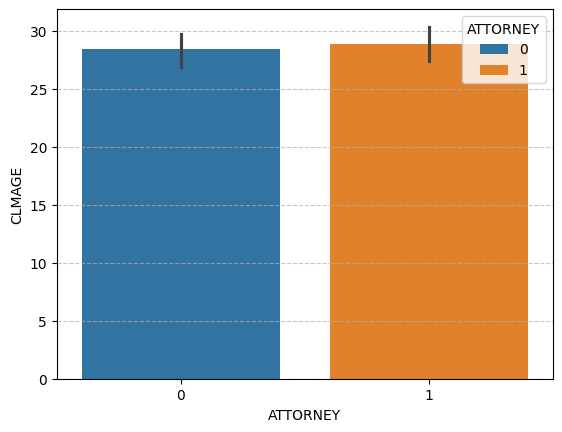

In [20]:
 #Add grid lines for better visualization of steps

sns.barplot(x='ATTORNEY', y='CLMAGE', data=df,hue = 'ATTORNEY')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
#for col in  ["CLMAGE", "LOSS", "Claim_Amount_Requested", "Settlement_Amount"]:
#    sns.barplot(x='ATTORNEY', y=col, data=df,hue = 'ATTORNEY')
#    plt.show()

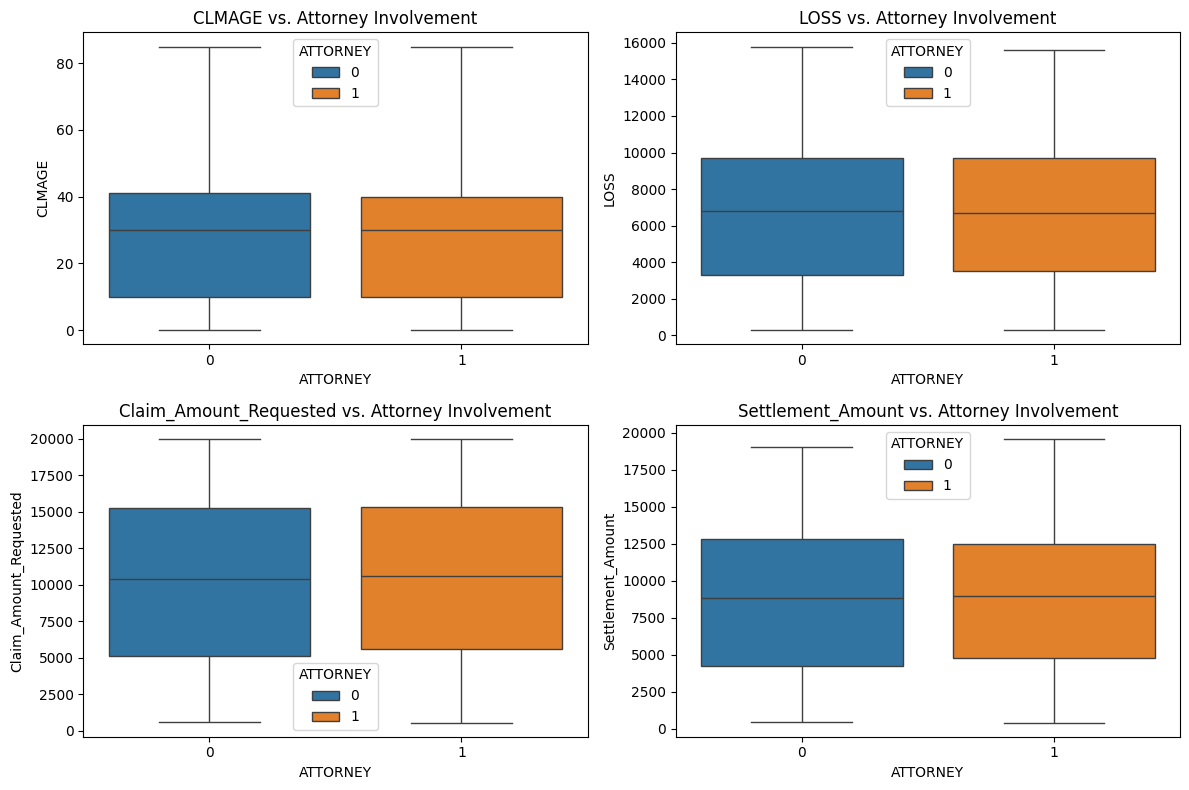

In [22]:
# Boxplot to check numerical features' distributions across attorney involvement
num_cols = ["CLMAGE", "LOSS", "Claim_Amount_Requested", "Settlement_Amount"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="ATTORNEY", y=df[col], data=df, hue = 'ATTORNEY' )
    plt.title(f"{col} vs. Attorney Involvement")
plt.tight_layout()
plt.show()


**Observations from Boxplots:**
- Claim_Amount_Requested & Settlement_Amount are higher when an attorney is involved.
- LOSS seems slightly higher when an attorney is involved, but not as distinct.
- CLMAGE does not show a strong difference between the two categories.

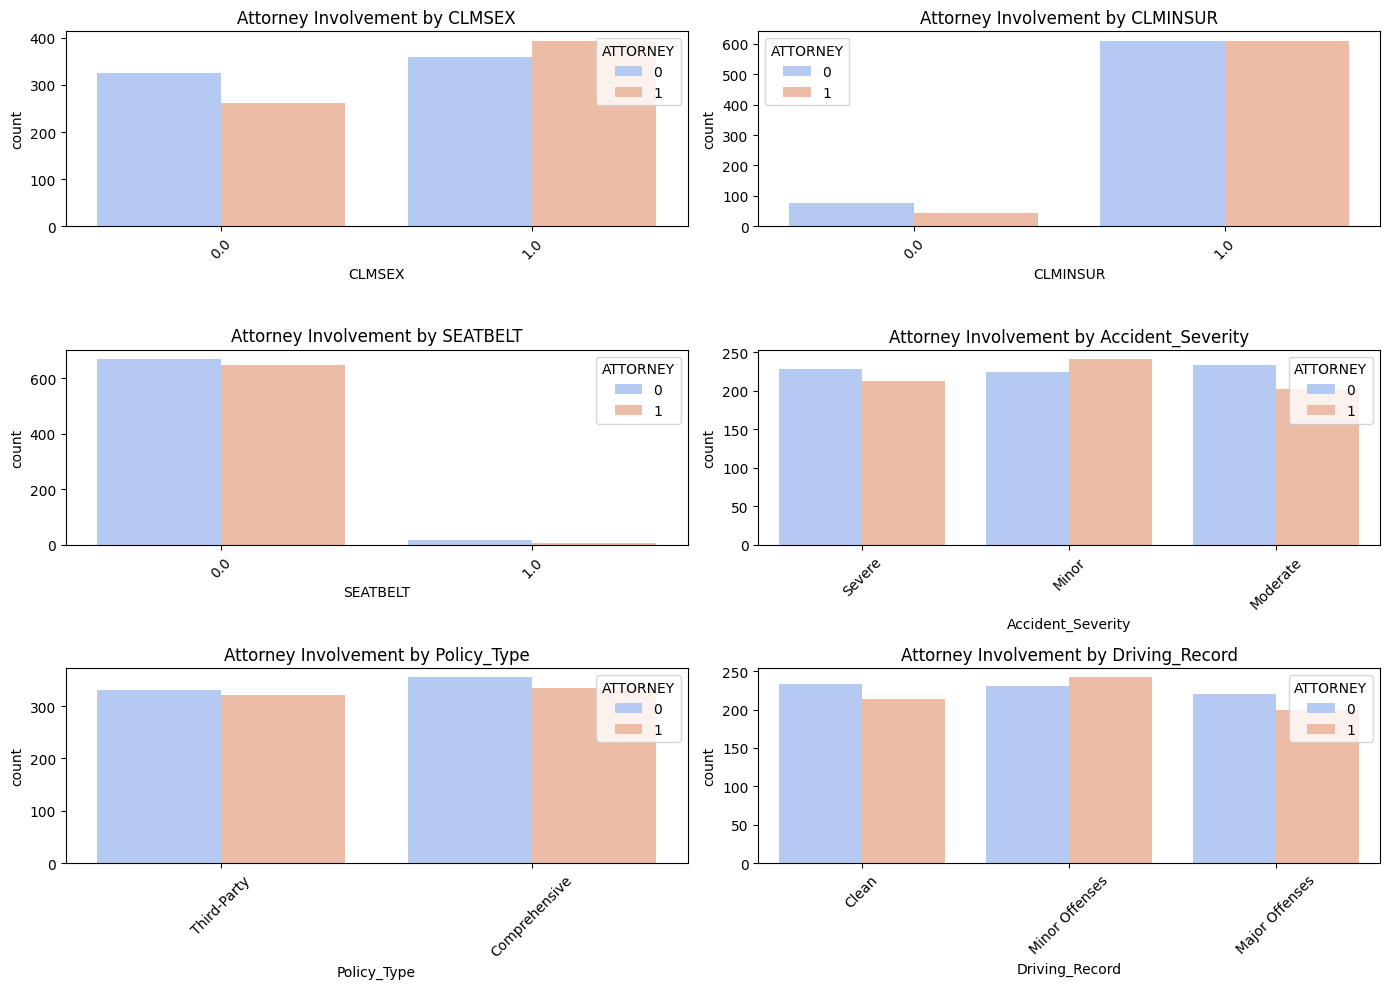

In [23]:
# Countplots for categorical features
cat_cols = ["CLMSEX", "CLMINSUR", "SEATBELT", "Accident_Severity", "Policy_Type", "Driving_Record"]

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue="ATTORNEY", data=df, palette="coolwarm")
    plt.title(f"Attorney Involvement by {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Insights from Categorical Features:**

- **Accident Severity:** Severe accidents have a higher proportion of attorney involvement.
- **Policy Type:** Comprehensive policies have more attorney involvement than third-party policies.
- **Driving Record:** Claims from people with minor offenses see more attorney involvement.
- **Seatbelt Usage:** Non-seatbelt users are more likely to have an attorney.

In [24]:
df_num_col = df[df.select_dtypes(include=['int64', 'float64']).columns]
df_cat_col = df[df.select_dtypes(exclude=['int64', 'float64']).columns]

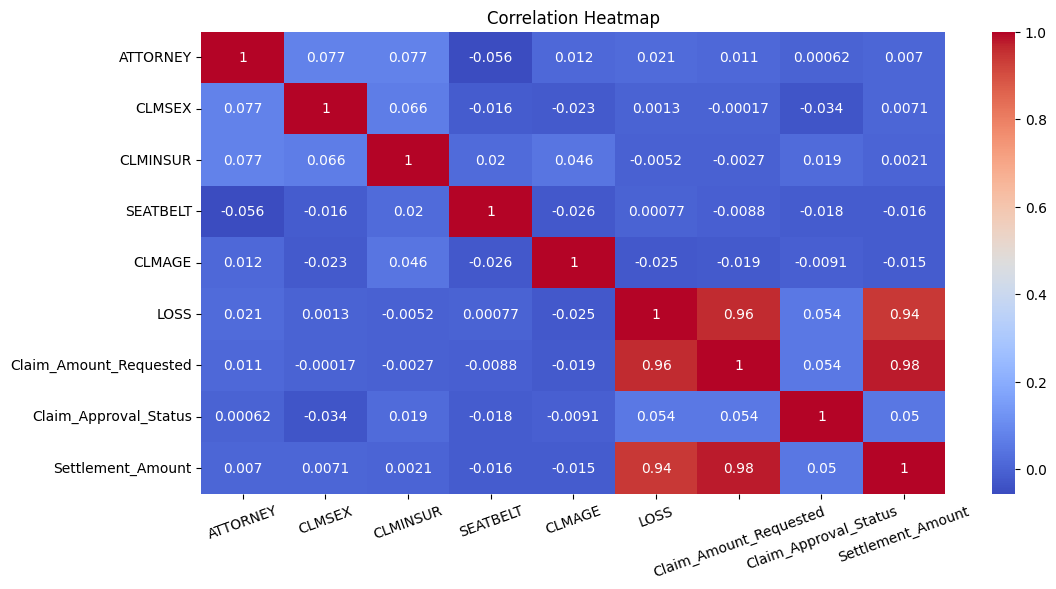

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df_num_col.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=20)
plt.show()

**Correlation Analysis:**

- Settlement_Amount and Claim_Amount_Requested have a strong positive correlation.
- LOSS also correlates with settlement and claim amounts.

## Data Transformation

In [26]:
# Identify Skewed Features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_skewness = df[numerical_columns].skew().sort_values(ascending=False)
skewed_features = numerical_skewness[numerical_skewness.abs() > 1].index

1.**numerical_skewness.abs() > 1**: This filters out features that have a skewness value greater than 1 (or less than -1). The threshold of 1 (or -1) is commonly used to identify features that are "significantly" skewed, meaning their distribution is far from normal.

2.**.index**: This extracts the names (or column labels) of the skewed features.

In [27]:
numerical_skewness

SEATBELT                  7.619431
CLMAGE                    0.392756
LOSS                      0.122325
Claim_Approval_Status     0.077758
Settlement_Amount         0.066119
ATTORNEY                  0.044838
Claim_Amount_Requested   -0.044600
CLMSEX                   -0.253024
CLMINSUR                 -2.878119
dtype: float64

**Skewness Analysis**:
Highly skewed features (|skewness| > 1):

1. SEATBELT (7.61) → Highly right-skewed.
2. CLMINSUR (-2.87) → Left-skewed.

## Feature Scaling and Data Splitting

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=["Accident_Severity", "Policy_Type", "Driving_Record"], drop_first=True) #

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ATTORNEY                       1340 non-null   int64  
 1   CLMSEX                         1340 non-null   float64
 2   CLMINSUR                       1340 non-null   float64
 3   SEATBELT                       1340 non-null   float64
 4   CLMAGE                         1340 non-null   float64
 5   LOSS                           1340 non-null   float64
 6   Claim_Amount_Requested         1340 non-null   float64
 7   Claim_Approval_Status          1340 non-null   int64  
 8   Settlement_Amount              1340 non-null   float64
 9   Accident_Severity_Moderate     1340 non-null   bool   
 10  Accident_Severity_Severe       1340 non-null   bool   
 11  Policy_Type_Third-Party        1340 non-null   bool   
 12  Driving_Record_Major Offenses  1340 non-null   b

In [30]:
# Check for boolean columns
bool_columns = df.select_dtypes(include='bool').columns
#print(bool_columns)
# Convert boolean columns to integers (True -> 1, False -> 0)
df[bool_columns] = df[bool_columns].astype(int)
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Accident_Severity_Moderate,Accident_Severity_Severe,Policy_Type_Third-Party,Driving_Record_Major Offenses,Driving_Record_Minor Offenses
0,0,0.0,1.0,0.0,50.0,2367.86,4497.19,1,3221.74,0,1,1,0,0
1,1,1.0,0.0,0.0,18.0,3746.41,6216.38,1,6166.17,0,0,0,0,0
2,1,0.0,1.0,0.0,5.0,14282.43,17978.55,0,13804.61,0,1,0,0,1
3,0,0.0,1.0,1.0,31.0,519.12,753.54,1,596.25,0,1,0,0,0
4,1,0.0,1.0,0.0,30.0,1354.31,2167.42,0,1714.83,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,30.0,11749.94,14992.27,0,13533.51,1,0,0,0,0
1336,0,1.0,1.0,0.0,46.0,776.62,1438.79,0,1178.05,1,0,1,1,0
1337,1,1.0,1.0,0.0,39.0,13261.20,18106.45,1,16782.44,0,1,1,0,1
1338,0,1.0,0.0,0.0,8.0,9919.60,17119.15,1,14315.98,0,0,1,0,0


In [31]:
# Standardize numerical variables
scaler = StandardScaler()
num_cols = ["CLMAGE", "LOSS", "Claim_Amount_Requested", "Settlement_Amount"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Define features and target
X = df.drop(columns=["ATTORNEY"])
y = df["ATTORNEY"]

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shape after preprocessing
X_train.shape, X_test.shape

((1072, 13), (268, 13))

In [32]:
X.columns

Index(['CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS',
       'Claim_Amount_Requested', 'Claim_Approval_Status', 'Settlement_Amount',
       'Accident_Severity_Moderate', 'Accident_Severity_Severe',
       'Policy_Type_Third-Party', 'Driving_Record_Major Offenses',
       'Driving_Record_Minor Offenses'],
      dtype='object')

In [33]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Accident_Severity_Moderate,Accident_Severity_Severe,Policy_Type_Third-Party,Driving_Record_Major Offenses,Driving_Record_Minor Offenses
0,0.0,1.0,0.0,1.137765,-1.140900,-1.029498,1,-1.126567,0,1,1,0,0
1,1.0,0.0,0.0,-0.565764,-0.776553,-0.726652,1,-0.530617,0,0,0,0,0
2,0.0,1.0,0.0,-1.257822,2.008082,1.345324,0,1.015397,0,1,0,0,1
3,0.0,1.0,1.0,0.126295,-1.629515,-1.688964,1,-1.657964,0,1,0,0,0
4,0.0,1.0,0.0,0.073059,-1.408777,-1.439901,0,-1.431564,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.0,1.0,0.0,0.073059,1.338753,0.819273,0,0.960526,1,0,0,0,0
1336,1.0,1.0,0.0,0.924824,-1.561459,-1.568253,0,-1.540208,1,0,1,1,0
1337,1.0,1.0,0.0,0.552177,1.738174,1.367855,1,1.618107,0,1,1,0,1
1338,1.0,0.0,0.0,-1.098116,0.855000,1.193936,1,1.118898,0,0,1,0,0


## Model building 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel='rbf', C=1, gamma='scale', class_weight='balanced', random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_pred)
    }

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
results_df


C:\Users\kavya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:39:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.582090,0.570370,0.587786,0.578947,0.582214
Decision Tree,0.488806,0.477612,0.488550,0.483019,0.488800
Random Forest,0.485075,0.472868,0.465649,0.469231,0.484649
XGBoost,0.503731,0.491525,0.442748,0.465863,0.502396
SVM,0.541045,0.528571,0.564885,0.546125,0.541567


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  # Regularization strength
    "solver": ["liblinear", "lbfgs"]  # Solver options
}

# Perform grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate best model on test data
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Compute performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

tuned_results = {
    "Accuracy": round(accuracy_score(y_test, y_pred_best),3),
    "Precision": round(precision_score(y_test, y_pred_best),3),
    "Recall": round(recall_score(y_test, y_pred_best),3),
    "F1 Score": round(f1_score(y_test, y_pred_best),3),
    "ROC AUC": round(roc_auc_score(y_test, y_prob_best),3)
}

print("Best Parameters:", best_params)
print("Tuned Model Performance:", tuned_results)


Best Parameters: {'C': 100, 'solver': 'liblinear'}
Tuned Model Performance: {'Accuracy': 0.582, 'Precision': 0.57, 'Recall': 0.588, 'F1 Score': 0.579, 'ROC AUC': np.float64(0.57)}


###### 

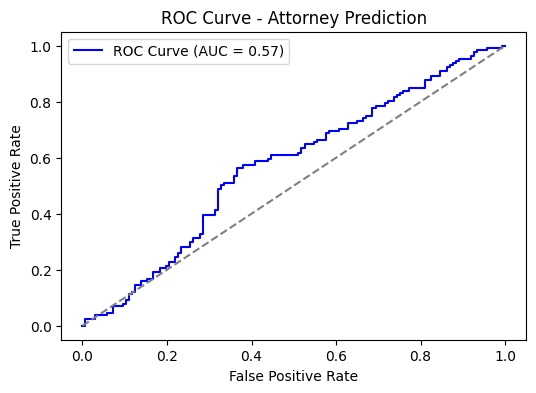

In [36]:
from sklearn.metrics import  roc_curve,auc
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve - Attorney Prediction')
plt.legend()
plt.show()


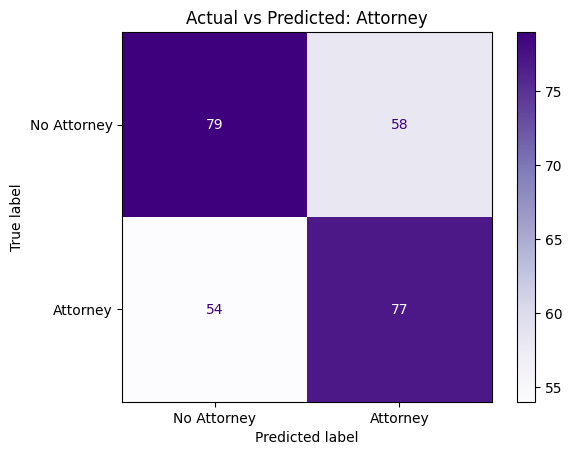

In [41]:
# y_test = actual values, y_pred_best = predicted labels (after tuning)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attorney", "Attorney"])

disp.plot(cmap='Purples')
plt.title("Actual vs Predicted: Attorney")
plt.show()

In [42]:
best_model

LogisticRegression(C=100, solver='liblinear')

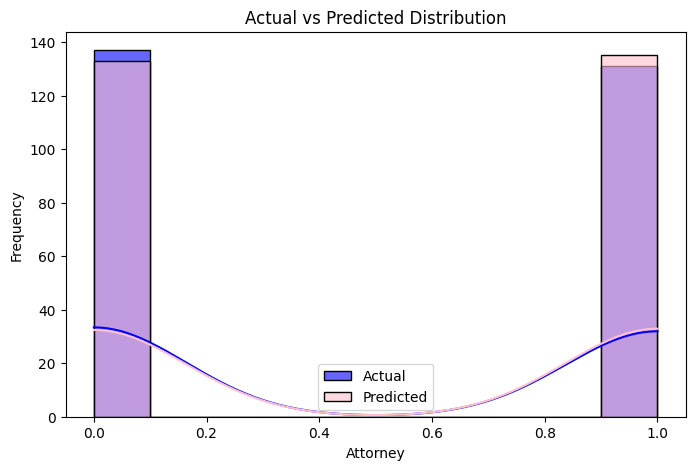

In [43]:
# General Data Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(y_test, color='blue', label='Actual', kde=True, bins=10, alpha=0.6)
sns.histplot(y_pred_best, color='pink', label='Predicted', kde=True, bins=10, alpha=0.6)
plt.xlabel('Attorney')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted Distribution')
plt.legend()
plt.show()

https://attorneypred-9o9qcuekpimgyhjf5orqgk.streamlit.app/